# Импорт

In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
from random import shuffle
sys.path.append("../Project")
from Classes.Ant import Ant
from Classes.TrackOfWalk import TrackOfWalk

# Общие переменные

In [2]:
field_size = 100

In [3]:
feromon_map = np.random.rand(field_size, field_size)
feromon_map = (feromon_map + feromon_map.T) / 2 
np.fill_diagonal(feromon_map, -np.inf)
distance_map = np.random.rand(field_size, field_size)
distance_map = (distance_map + distance_map.T) / 2 
np.fill_diagonal(distance_map, -np.inf)

In [4]:
print(feromon_map)

[[      -inf 0.20459461 0.54194774 ... 0.41222188 0.56596775 0.52396188]
 [0.20459461       -inf 0.60032163 ... 0.58808072 0.39671497 0.76275817]
 [0.54194774 0.60032163       -inf ... 0.65695023 0.2591524  0.80110144]
 ...
 [0.41222188 0.58808072 0.65695023 ...       -inf 0.56486591 0.39457271]
 [0.56596775 0.39671497 0.2591524  ... 0.56486591       -inf 0.23070952]
 [0.52396188 0.76275817 0.80110144 ... 0.39457271 0.23070952       -inf]]


In [5]:
print(distance_map)

[[      -inf 0.28961312 0.38833069 ... 0.59900566 0.22953969 0.46557054]
 [0.28961312       -inf 0.40689733 ... 0.64219665 0.49849208 0.70297582]
 [0.38833069 0.40689733       -inf ... 0.58177753 0.8524925  0.4153041 ]
 ...
 [0.59900566 0.64219665 0.58177753 ...       -inf 0.72979408 0.34661599]
 [0.22953969 0.49849208 0.8524925  ... 0.72979408       -inf 0.22029377]
 [0.46557054 0.70297582 0.4153041  ... 0.34661599 0.22029377       -inf]]


In [6]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


In [7]:
def experement(ant: Ant,
               pos: iter,
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray):
    track = ant.walk(pos=pos, 
                     distance_matrix=distance_map, 
                     feromon_matrix=feromon_map)
    feromon_map = feromon_map_updater.update(track=track, 
                                                feromon_matrix=feromon_map)
    return feromon_map

In [8]:
ants = [Ant(walk_distance=field_size+1, a=1, b=i) for i in range(1, 100)]
ants_blocks = [[Ant(walk_distance=field_size+1, a=1, b=1) for i in range(1, j)] for j in range(10, 100, 5)]
feromon_map_updater = TrackOfWalk(feromon_volume=field_size*100, feromon_erosion_speed=0.9999)
positions = [[i, i] for i in range(0, 100, 1)]
shuffle(positions)


In [9]:
def Dijkstra(N, S, matrix):
	valid = [True]*N        
	weight = [np.inf]*N
	weight[S] = 0
	way = []
	for i in range(N):
		min_weight = np.inf
		ID_min_weight = -1
		for j in range(N):
			if valid[j] and weight[j] < min_weight:
				min_weight = weight[j]
				ID_min_weight = j
		for z in range(N):
			if weight[ID_min_weight] + matrix[ID_min_weight][z] < weight[z]:
				weight[z] = weight[ID_min_weight] + matrix[ID_min_weight][z]
		valid[ID_min_weight] = False
		way.append(ID_min_weight)
	return weight, way

In [10]:
def experement_ants(ants, positions, num_of_iterations, feromon_map, distance_map):
    fm = np.array(feromon_map, copy=True)
    for _ in range(num_of_iterations):
        for ant, pos in zip(ants, positions):
            fm = experement(ant=ant, 
                            pos=pos, 
                            feromon_map_updater=feromon_map_updater, 
                            feromon_map=fm, 
                            distance_map=distance_map)
    way = Dijkstra(100, 1, fm*(-1))[1]
    print(way)
    return [distance_map[i[0], i[1]] for i in np.array(list(zip(way[:-2], way[1:])))], way, fm

In [11]:
res = []
for ants_block in ants_blocks:
    res.append(experement_ants(ants=ants_block, positions=positions, num_of_iterations=10, feromon_map=feromon_map, distance_map=distance_map))

[1, 12, 8, 19, 46, 53, 97, 84, 68, 42, 92, 38, 54, 41, 29, 63, 27, 50, 10, 98, 4, 48, 43, 78, 39, 96, 22, 6, 95, 62, 77, 16, 82, 94, 91, 37, 35, 81, 89, 59, 3, 93, 52, 30, 13, 49, 85, 60, 14, 55, 40, 33, 67, 90, 9, 0, 34, 26, 64, 99, 56, 20, 58, 32, 76, 36, 61, 72, 24, 5, 86, 57, 87, 75, 70, 7, 2, 66, 45, 74, 15, 83, 28, 65, 88, 69, 73, 21, 44, 11, 18, 25, 79, 47, 31, 23, 80, 71, 51, 17]
[1, 12, 8, 19, 46, 53, 97, 84, 68, 42, 92, 38, 54, 41, 29, 63, 27, 50, 10, 98, 4, 48, 43, 78, 39, 96, 22, 6, 95, 62, 77, 16, 82, 94, 91, 37, 35, 81, 89, 59, 3, 93, 52, 30, 13, 49, 85, 60, 14, 55, 40, 57, 86, 83, 15, 74, 45, 21, 72, 61, 69, 73, 58, 32, 71, 51, 17, 33, 67, 90, 9, 0, 34, 26, 64, 99, 56, 20, 88, 65, 28, 70, 7, 2, 66, 76, 36, 23, 31, 47, 79, 44, 11, 18, 25, 24, 5, 75, 87, 80]
[1, 12, 8, 19, 46, 53, 97, 84, 68, 42, 92, 98, 4, 48, 43, 78, 39, 96, 22, 6, 95, 62, 77, 16, 82, 94, 91, 37, 35, 81, 27, 50, 10, 29, 63, 70, 28, 67, 90, 89, 59, 3, 93, 52, 30, 13, 49, 85, 60, 14, 55, 41, 54, 38, 33, 40

In [12]:
h_mark = []
h_mean = []
h_max = []
w_mark = []
w_mean = []
w_max = []
for i in distance_map:
    w_mark.append(i[i != -np.inf].min())
    w_mean.append(i[i != -np.inf].mean())
    h_max.append(i[i != -np.inf].max())
for i in distance_map:
    h_mark.append(i[i != -np.inf].min())
    h_mean.append(i[i != -np.inf].mean())
    w_max.append(i[i != -np.inf].max())

sum(h_mark), sum(w_mark), sum(h_mean), sum(w_mean), sum(h_max), sum(w_max)

(6.61347534153957,
 6.61347534153957,
 50.0799270017695,
 50.0799270017695,
 93.59395972142262,
 93.59395972142262)

<Axes: xlabel='N_ants', ylabel='res'>

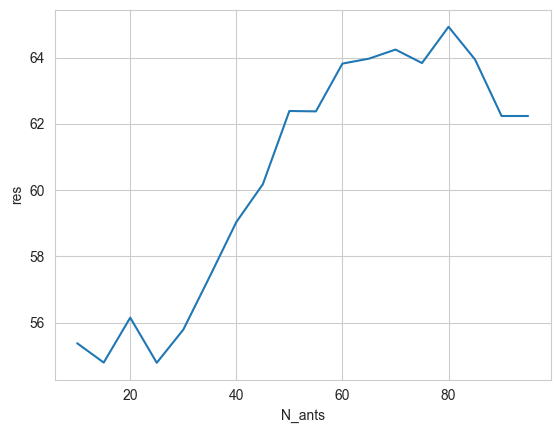

In [19]:
sns.set_style("whitegrid")
sns.lineplot(data={'N_ants': list(range(10, 100, 5)), 'res': [sum(i[0]) for i in res]}, x="N_ants", y="res")
# sns.lineplot(data={'count': list(range(25, 100, 5)), 'res': [sum(h_mean) for i in res]}, x="count", y="res")

In [14]:
way = Dijkstra(100, 1, feromon_map*(-1))[1]
ways = np.array(list(zip(way[:-2], way[1:])))

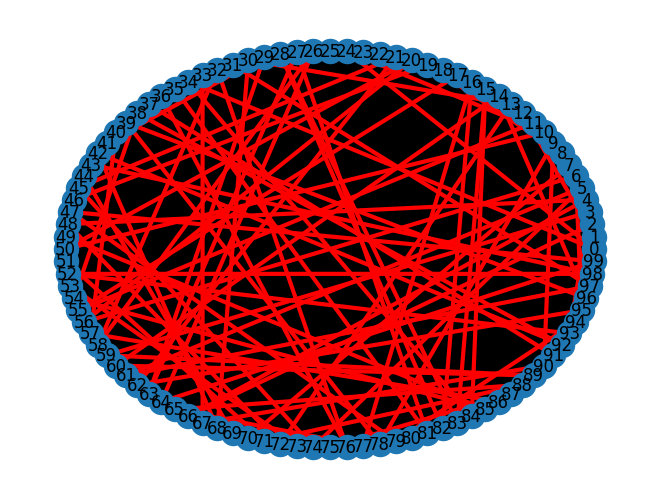

In [15]:
K1 = nx.Graph()

for start, end, length in edges:
    K1.add_edge(start, end, length=length)

nx.draw_circular(K1, with_labels = True)
nx.draw_networkx_edges(K1, nx.circular_layout(K1), edgelist=ways, edge_color='r', arrows=True, width=3)

In [16]:
distance = []
for i in ways:
    distance.append(distance_map[i[0], i[1]])
sum(distance)

51.3734057254671

In [17]:
h_mark = []
h_mean = []
h_max = []
w_mark = []
w_mean = []
w_max = []
for i in distance_map:
    w_mark.append(i[i != -np.inf].min())
    w_mean.append(i[i != -np.inf].mean())
    h_max.append(i[i != -np.inf].max())
for i in distance_map:
    h_mark.append(i[i != -np.inf].min())
    h_mean.append(i[i != -np.inf].mean())
    w_max.append(i[i != -np.inf].max())

sum(h_mark), sum(w_mark), sum(h_mean), sum(w_mean), sum(h_max), sum(w_max)

(6.61347534153957,
 6.61347534153957,
 50.0799270017695,
 50.0799270017695,
 93.59395972142262,
 93.59395972142262)